In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_temp = pd.read_csv('city_temperature.csv', low_memory=False)
df_temp.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
stats = df_temp[['Region', 'AvgTemperature']].groupby(['Region']).agg(['mean', 'min', 'max'])

print(stats)

                                  AvgTemperature             
                                            mean   min    max
Region                                                       
Africa                                 53.549517 -99.0  102.8
Asia                                   62.568652 -99.0  103.7
Australia/South Pacific                61.180869 -99.0   96.8
Europe                                 46.696285 -99.0  102.5
Middle East                            68.384554 -99.0  110.0
North America                          55.300933 -99.0  107.7
South/Central America & Carribean      62.189439 -99.0   97.4


In [99]:
df_temp.reset_index()
grouped = df_temp[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).agg(['mean', 'median', 'sum', 'min', 'max'])

grouped.loc[(['Africa', 'Europe'], 1999), :]

df_temp.reset_index()

,index,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...,...
2905882,2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2905883,2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2905884,2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2905885,2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [37]:
df_temp.reset_index()
df = df_temp.drop(columns=['Day']).pivot_table(columns='Region', index=['Year','Month'], aggfunc=['min', 'max', 'mean'], values='AvgTemperature' )

In [28]:


df

min                                                   \
Region     Africa  Asia Australia/South Pacific Europe Middle East   
Year Month                                                           
200  12       NaN   NaN                     NaN  -99.0         NaN   
201  11       NaN   NaN                     NaN  -99.0         NaN   
     12     -99.0   NaN                     NaN  -99.0         NaN   
1995 1      -99.0 -99.0                    54.3  -99.0       -99.0   
     2      -99.0 -99.0                    58.3  -99.0       -99.0   
...           ...   ...                     ...    ...         ...   
2020 1       45.4 -99.0                    55.8  -99.0        20.9   
     2      -99.0 -16.5                    55.0   12.9        21.3   
     3      -99.0 -99.0                    51.3  -99.0        29.0   
     4      -99.0 -99.0                    44.8  -99.0       -99.0   
     5      -99.0 -99.0                    38.8  -99.0        49.0   

                                                              max        \
Region     North America South/Central America & Carribean Africa  Asia   
Year Month                                                                
200  12              NaN                               NaN    NaN   NaN   
201  11              NaN                               NaN    NaN   NaN   
     12            -99.0                               NaN  -99.0   NaN   
1995 1             -99.0                             -99.0   88.7  86.1   
     2             -99.0                             -99.0   89.1  88.1   
...                  ...                               ...    ...   ...   
2020 1             -99.0                             -99.0   86.7  85.9   
     2             -30.2                             -99.0   88.4  86.9   
     3             -99.0                             -99.0   97.9  88.5   
     4             -99.0                             -99.0  100.6  95.1   
     5             -99.0                             -99.0  100.7  96.9   

                                    ...                            \
Region     Australia/South Pacific  ... Middle East North America   
Year Month                          ...                             
200  12                        NaN  ...         NaN           NaN   
201  11                        NaN  ...         NaN           NaN   
     12                        NaN  ...         NaN         -99.0   
1995 1                        85.3  ...        70.4          80.0   
     2                        90.5  ...        78.2          80.9   
...                            ...  ...         ...           ...   
2020 1                        93.1  ...        75.8          79.4   
     2                        93.2  ...        81.9          80.0   
     3                        83.3  ...        85.9          85.4   
     4                        82.8  ...        94.5          88.7   
     5                        72.4  ...        96.3          91.3   

                                                   mean             \
Region     South/Central America & Carribean     Africa       Asia   
Year Month                                                           
200  12                                  NaN        NaN        NaN   
201  11                                  NaN        NaN        NaN   
     12                                  NaN -99.000000        NaN   
1995 1                                  87.8  46.845150  37.697626   
     2                                  89.6  48.918878  39.696954   
...                                      ...        ...        ...   
2020 1                                  84.7  73.178763  52.707136   
     2                                  87.5  74.888218  56.772832   
     3                                  86.8  75.572043  62.783480   
     4                                  90.5  75.562500  68.732020   
     5                                  87.4  75.578827  75.433492   

                                  

In [39]:
df.columns

MultiIndex([( 'min',                            'Africa'),
            ( 'min',                              'Asia'),
            ( 'min',           'Australia/South Pacific'),
            ( 'min',                            'Europe'),
            ( 'min',                       'Middle East'),
            ( 'min',                     'North America'),
            ( 'min', 'South/Central America & Carribean'),
            ( 'max',                            'Africa'),
            ( 'max',                              'Asia'),
            ( 'max',           'Australia/South Pacific'),
            ( 'max',                            'Europe'),
            ( 'max',                       'Middle East'),
            ( 'max',                     'North America'),
            ( 'max', 'South/Central America & Carribean'),
            ('mean',                            'Africa'),
            ('mean',                              'Asia'),
            ('mean',           'Australia/South Pacific'

In [45]:
df.loc[(slice(None), slice(None)), (['min', 'max'], 'Africa')] # odpowiedz

min    max
Region     Africa Africa
Year Month              
200  12       NaN    NaN
201  11       NaN    NaN
     12     -99.0  -99.0
1995 1      -99.0   88.7
     2      -99.0   89.1
...           ...    ...
2020 1       45.4   86.7
     2      -99.0   88.4
     3      -99.0   97.9
     4      -99.0  100.6
     5      -99.0  100.7

[308 rows x 2 columns]

🔥 Zadanie 2 🔥

Dla datasetu z zadania 1 wyznacz temperatury w grudniu i czerwcu dla wszystkich regionów. Na 2 subplotach (czerwiec/grudzień) wyświetl w formie wykresu liniowego zmiany temperatur w latach obserwacji dla poszczególnych regionów, czy łatwiej ten wykres wygenerować dla tabeli przestawnej czy dla datasetu z zadania 1?


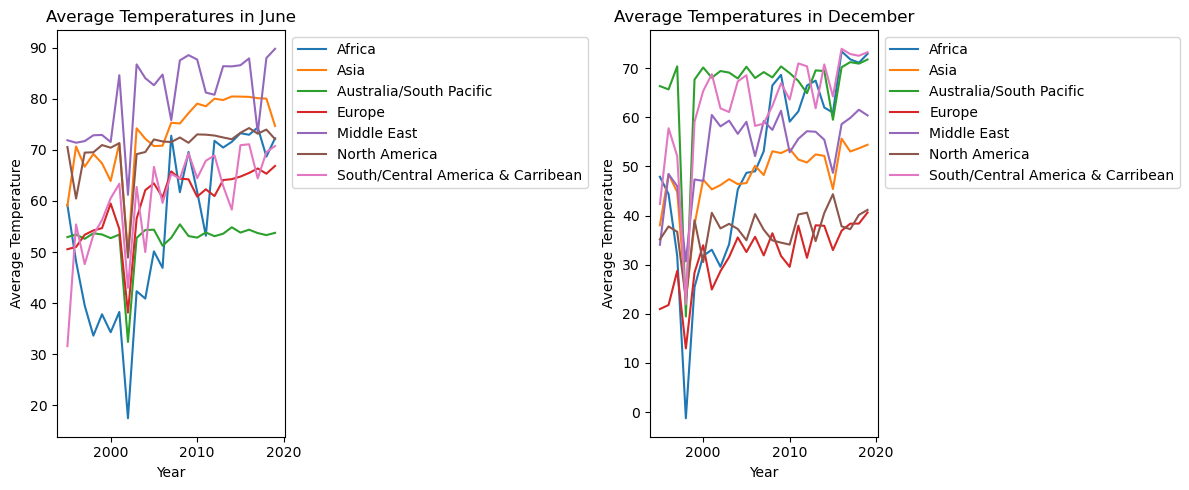

In [105]:
df_temp.reset_index()
df_temp = df_temp[df_temp['Year'] >= 1900]
grouped =  df_temp[['Region', 'Year', 'Month', 'AvgTemperature']].groupby(['Region', 'Year', 'Month']).mean()

june        = grouped.loc[(slice(None), slice(None), 6), :]
december    = grouped.loc[(slice(None), slice(None), 12), :]


# Create a list of region names
regions = june.index.get_level_values('Region').unique()

# Create subplots for June and December
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot each region in June
for region in regions:
    june_region = june.xs(region, level='Region')
    axes[0].plot(june_region.index.get_level_values('Year'), june_region['AvgTemperature'], label=region)

# Plot each region in December
for region in regions:
    december_region = december.xs(region, level='Region')
    axes[1].plot(december_region.index.get_level_values('Year'), december_region['AvgTemperature'], label=region)

# Set titles and labels
axes[0].set_title('Average Temperatures in June')
axes[1].set_title('Average Temperatures in December')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('Average Temperature')
axes[1].set_ylabel('Average Temperature')

# Add legends
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plots
plt.tight_layout()
plt.show()


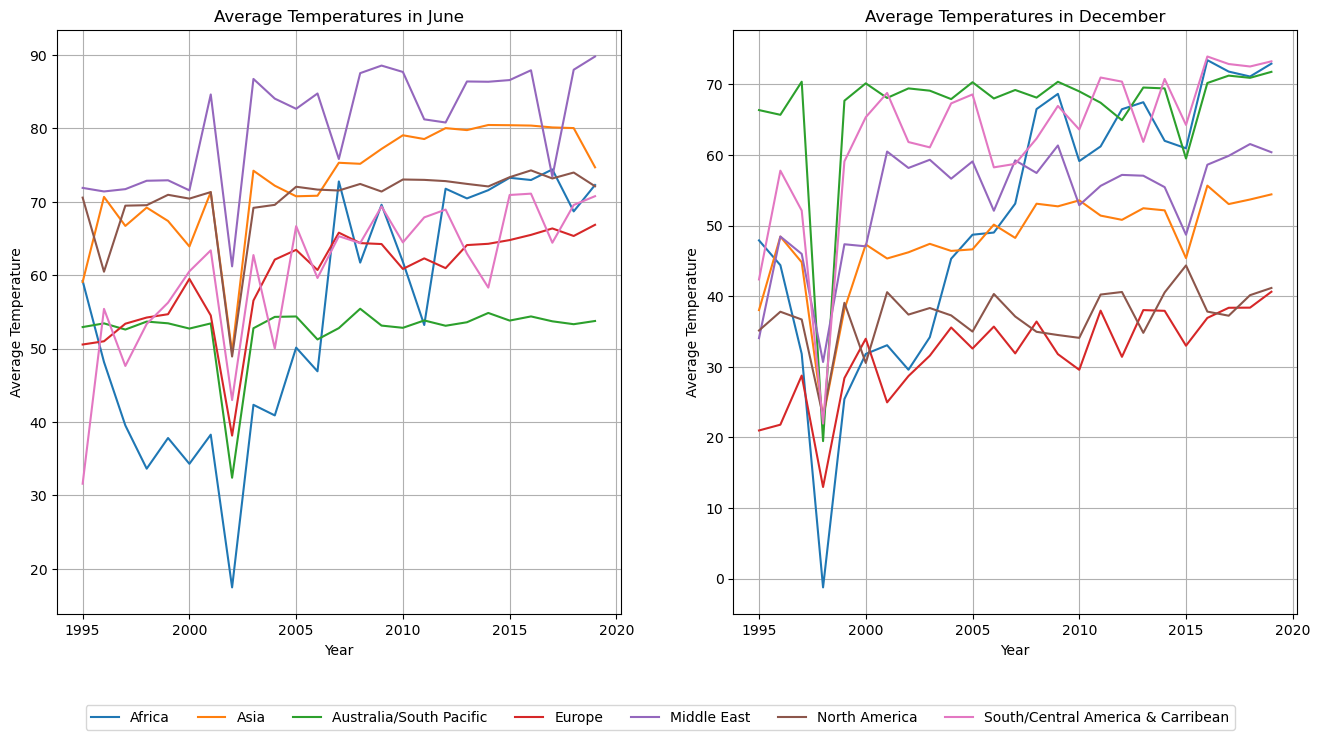

In [10]:
df_temp.reset_index()

pivot = df_temp.pivot_table(columns='Region', index=['Year', 'Month'], aggfunc=['mean'], values='AvgTemperature')
june        = pivot.loc[(slice(None), 6), :]
december    = pivot.loc[(slice(None), 12), :]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# June plot
june.unstack().plot(ax=axes[0], legend=False)
axes[0].set_title('Average Temperatures in June')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Temperature')
axes[0].grid()

# December plot
december.unstack().plot(ax=axes[1], legend=False)
axes[1].set_title('Average Temperatures in December')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Temperature')
axes[1].grid()


# Legend
regions = pivot.columns.get_level_values(1).unique()

handles, _ = axes[0].get_legend_handles_labels()

common_legend = fig.legend(handles, regions, loc='lower center', ncol=len(regions))

# Adjust the layout to make room for the common legend
plt.subplots_adjust(bottom=0.15)  # Adjust the bottom margin to make room for the legend

# Place the common legend underneath both subplots
fig.subplots_adjust(bottom=0.15)
plt.show()

In [106]:
regions = df.columns.get_level_values(1).unique()
print(regions.astype(str))

Index(['Africa', 'Asia', 'Australia/South Pacific', 'Europe', 'Middle East',
       'North America', 'South/Central America & Carribean'],
      dtype='object', name='Region')


🔥 Zadanie 3 - końcowe🔥

Wczytaj dataset zawierający informacje o [pasażerach Titanica](titanic_train.csv.

    Używając grupowania lub tabeli przestawnej spróbuj stworzyć dataset zawierający informację o liczbie osób które przeżyły katastrofę z podziałem na płeć i klasę w której podróżowały
    Wyznacz udział procentowy osób, które przeżyły z uwzględnieniem płci i klasy biletu
    Wyniki z pkt 2 wyświetl w formie wykresu słupkowego, gdzie bary pogrupowane są wg płci a w obrębie grupy przedstawiony jest procentowa przeżywalność w poszczególnych klasach. Pamiętaj żeby wykres opatrzony był legendą.


In [108]:
titanic_df = pd.read_csv('titanic_train.csv', low_memory=False)
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex']]

pivot = titanic_df.dropna().pivot_table(index=['Pclass', 'Sex'], aggfunc=['sum', 'count', 'mean'])
# pivot = df_temp.drop(columns='Day').pivot_table(columns='Region', index=['Year', 'Month'], aggfunc=['mean'], values='AvgTemperature')
pivot.head()

sum    count      mean
              Survived Survived  Survived
Pclass Sex                               
1      female       91       94  0.968085
       male         45      122  0.368852
2      female       70       76  0.921053
       male         17      108  0.157407
3      female       72      144  0.500000

314

In [158]:
titanic_df = pd.read_csv('titanic_train.csv', low_memory=False)
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex']]

pivot = titanic_df.pivot_table(index='Pclass', columns='Sex', aggfunc=['count'])
pivot

female_num = pivot['count']['Survived']['female'].sum()
male_num = pivot['count']['Survived']['male'].sum()


pivot = titanic_df.pivot_table(index='Pclass', columns='Pclass', values ='Sex', aggfunc=['count'])

pivot

count                                   
Pclass      1      2      3      1      2      3
Pclass                                          
1       216.0    NaN    NaN  216.0    NaN    NaN
2         NaN  184.0    NaN    NaN  184.0    NaN
3         NaN    NaN  491.0    NaN    NaN  491.0

In [159]:
titanic_df = pd.read_csv('titanic_train.csv', low_memory=False)
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex']]

pivot = titanic_df.dropna().pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc=['count', 'mean'])
pivot.head()

count                mean                    
Pclass     1    2    3         1         2         3
Sex                                                 
female    94   76  144  0.968085  0.921053  0.500000
male     122  108  347  0.368852  0.157407  0.135447

            mean          
        Survived          
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


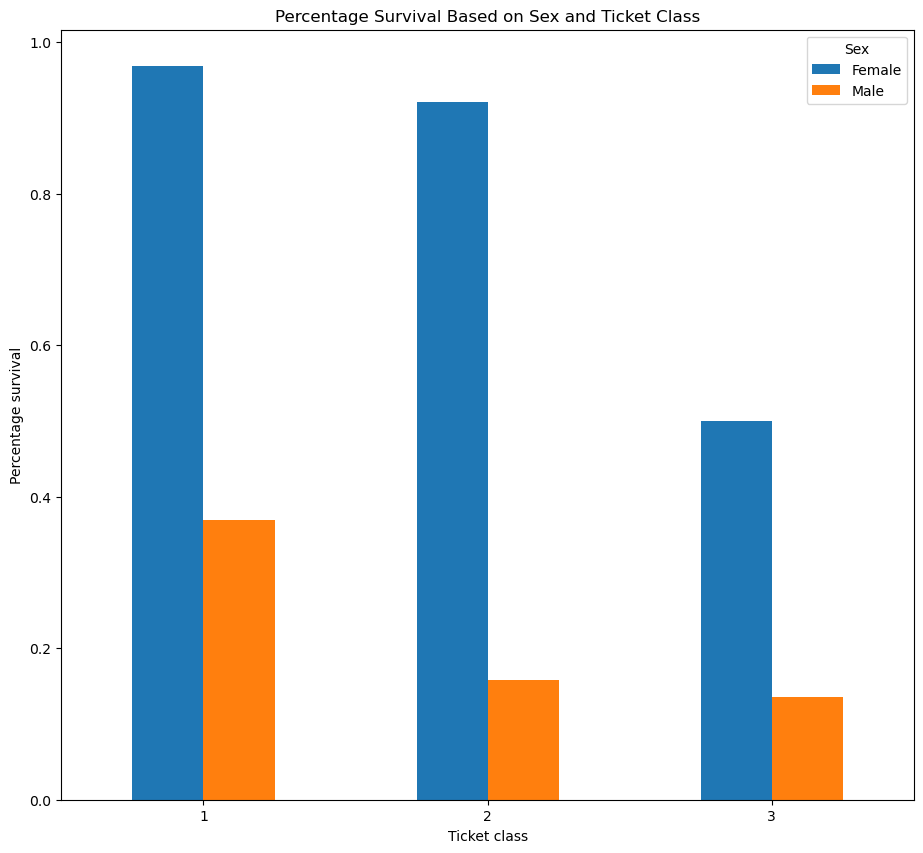

In [111]:
pivot = titanic_df.dropna().pivot_table(index=['Pclass', 'Sex'], values='Survived', aggfunc=['mean'])

pivot = pivot.unstack()

print(pivot)

pivot.plot(kind='bar', stacked=False, title='Percentage Survival Based on Sex and Ticket Class', figsize=(11,10))

plt.xlabel('Ticket class')
plt.ylabel('Percentage survival')

plt.legend(title='Sex', labels=['Female', 'Male'])
plt.xticks(rotation=0)
plt.show()

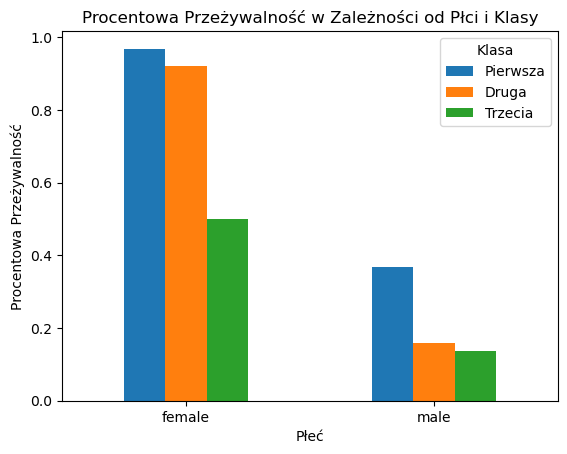

In [112]:
grouped = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean()
grouped


# Przekształć wyniki grupowania na wygodny format
pivot_table = grouped.unstack()

# Wyświetlenie wykresu słupkowego
pivot_table.plot(kind='bar', stacked=False, title='Procentowa Przeżywalność w Zależności od Płci i Klasy')
plt.xlabel('Płeć')
plt.ylabel('Procentowa Przeżywalność')
plt.legend(title='Klasa', labels=['Pierwsza', 'Druga', 'Trzecia'])
plt.xticks(rotation=0)
plt.show()

🔥 Zadanie 3🔥

Wczytaj i wyświetl sygnał ECG oraz chwile w których wykryto załamki R beatTimestamps. Czas wystąpienia załamka R podawany jest jako index próbki.

Wiedząc, że częstotliwość próbkowania wynosi 500Hz, wyznacza wartość średnią fali ecg w przedziale (-550ms; 400ms) względem wykrytych załamków R. Dla uśrednionego przebiegu zmierz wartość amplitudy załamka P, R, i T, oraz interwał Q-T. Sposób pomiaru przedstawiono na rysunku poniżej.

In [2]:



# segments = signal_example[(event_timestamps[:, np.newaxis] + sample_rate * time_vector).astype(int)]


In [101]:
# ecg = ecg['LeadI']

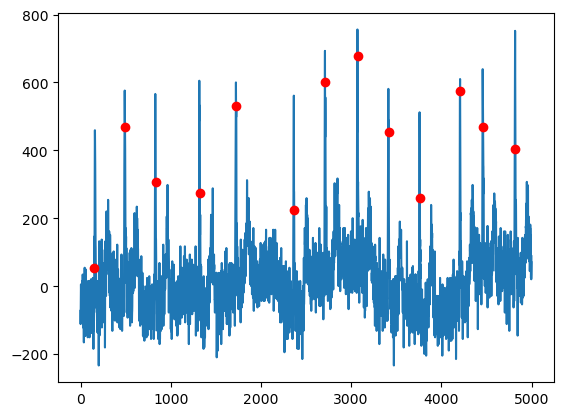

In [3]:
plt.plot(ecg['LeadI'])
plt.plot(ecg['LeadI'].iloc[beats['BeatTimestamp']], 'ro')
plt.show()

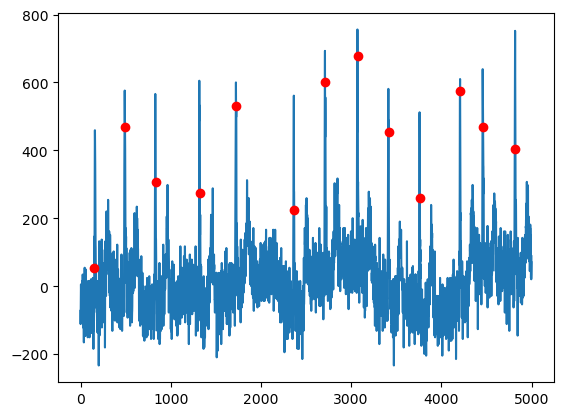

In [9]:
ecg = pd.read_csv('raw_ecg.csv', low_memory=False)
# ecg = ecg['LeadI']
beats = pd.read_csv('ecg_beats.csv', low_memory=False)
# beats = beats['BeatTimestamp']
range = np.arange(-0.55 * 500, 0.4 * 500)
# beats['BeatTimestamp']

plt.plot(ecg['LeadI'])
plt.plot(ecg['LeadI'].iloc[beats['BeatTimestamp']], 'ro')
beats = pd.read_csv('ecg_beats.csv', low_memory=False)
plt.show()

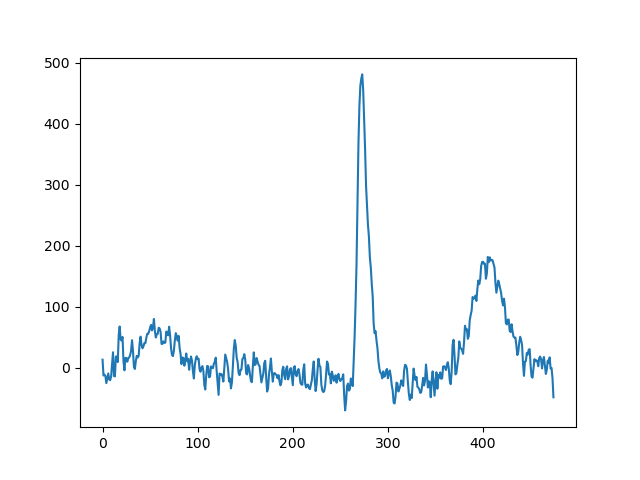

array([[ -73.,  -73.,  -73., ..., -122., -132.,  -83.],
       [ -68., -112.,  -93., ...,  -98., -146., -146.],
       [  39.,  -98.,  -98., ...,  -68.,  -39.,  -59.],
       ...,
       [-151., -122., -137., ...,   39.,   39., -127.],
       [ -83.,  -68.,  -39., ...,  -10.,   20.,   73.],
       [ 107.,  127.,   83., ...,   88.,   88.,   88.]])

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ecg = pd.read_csv('raw_ecg.csv', low_memory=False)
beats = pd.read_csv('ecg_beats.csv', low_memory=False)

beats = np.array(beats['BeatTimestamp'])
ecg = np.array(ecg['LeadI'])

# Define your range
range_values = np.arange(-0.55 * 500, 0.4 * 500)

# Create an array of indexes
ranges = (beats[:, np.newaxis] + range_values).astype(int)

# Clip indexes to be within the valid range
ranges = np.clip(ranges, 0, len(ecg)-1)

segments = ecg[ranges]

avg_signal = np.mean(segments, axis=0)


%matplotlib ipympl
plt.plot(avg_signal)
plt.show()

ecg[ranges]

(10000,)

In [56]:



signal_example = np.random.rand(10000)  # Example of a signal

# Generate example event timestamps
event_timestamps = np.sort(np.random.randint(1000, 9000, 20))  # Example event timestamps

# Create a time window around each event (e.g., -200 ms to 200 ms)
window_start = -0.55  # Start 550 ms before the event
window_end = 0.4  # End 400 ms after the event

# Create a time vector representing the time points for the analysis
sample_rate = 500  # Example sampling rate (500Hz)
time_vector = np.linspace(window_start, window_end, int((window_end - window_start) * sample_rate) + 1)

# Use NumPy vectorized operations to extract segments around each event
segments = signal_example[(event_timestamps[:, np.newaxis] + sample_rate * time_vector).astype(int)]

# Compute the average signal across all segments using vectorized operations
average_signal = np.mean(segments, axis=0)


In [55]:
signal_example = np.random.rand(10000)  # Example of a signal

# Generate example event timestamps
event_timestamps = np.sort(np.random.randint(1000, 9000, 20))  # Example event timestamps

# Create a time window around each event (e.g., -200 ms to 200 ms)
window_start = -0.2  # Start 200 ms before the event
window_end = 0.2  # End 200 ms after the event

# Create a time vector representing the time points for the analysis
sample_rate = 1000  # Example sampling rate (1 kHz)
time_vector = np.linspace(window_start, window_end, int((window_end - window_start) * sample_rate) + 1)

# Use NumPy vectorized operations to extract segments around each event
segments = signal_example[(event_timestamps[:, np.newaxis] + sample_rate * time_vector).astype(int)]

# Compute the average signal across all segments using vectorized operations
average_signal = np.mean(segments, axis=0)

In [57]:
(event_timestamps[:, np.newaxis] + sample_rate * time_vector).astype(int)

array([[1658, 1659, 1660, ..., 2056, 2057, 2058],
       [2032, 2033, 2034, ..., 2430, 2431, 2432],
       [2351, 2352, 2353, ..., 2749, 2750, 2751],
       ...,
       [6612, 6613, 6614, ..., 7010, 7011, 7012],
       [7160, 7161, 7162, ..., 7558, 7559, 7560],
       [7894, 7895, 7896, ..., 8292, 8293, 8294]])